# Available Data

In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt 

In [2]:
a_train = pd.read_json('../../Conala Challenge/conala-corpus/conala-train.json')

### Annotated Conala training samples

In [3]:
a_train[:5]

,intent,question_id,rewritten_intent,snippet
0,How to convert a list of multiple integers int...,41067960,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))"
1,How to convert a list of multiple integers int...,41067960,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))"
2,how to convert a datetime string back to datet...,4170655,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...
3,Averaging the values in a dictionary based on ...,29565452,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items..."
4,zip lists in python,13704860,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])"


In [4]:
for i in range(10):
    print("REWRITTEN INTENT: " + a_train.iloc[i]["rewritten_intent"])
    print("CODE: " + a_train.iloc[i]["snippet"])
    print()

REWRITTEN INTENT: Concatenate elements of a list 'x' of multiple integers to a single integer
CODE: sum(d * 10 ** i for i, d in enumerate(x[::-1]))

REWRITTEN INTENT: convert a list of integers into a single integer
CODE: r = int(''.join(map(str, x)))

REWRITTEN INTENT: convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'
CODE: datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')

REWRITTEN INTENT: get the average of a list values for each key in dictionary `d`)
CODE: [(i, sum(j) / len(j)) for i, j in list(d.items())]

REWRITTEN INTENT: zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list
CODE: zip([1, 2], [3, 4])

REWRITTEN INTENT: prepend string 'hello' to all items in list 'a'
CODE: ['hello{0}'.format(i) for i in a]

REWRITTEN INTENT: regex for repeating words in a string `s`
CODE: re.sub('(?<!\\S)((\\S+)(?:\\s+\\2))(?:\\s+\\2)+(?!\\S)', '\\1', s)

REWRITTEN INTENT: normali

In [5]:
print(len(a_train))

2379


### Mined Conala training samples

In [6]:
mined_train = pd.read_json('../../Conala Challenge/conala-corpus/conala-mined.jsonl', lines=True)

In [7]:
mined_train[:5]

,id,intent,parent_answer_post_id,prob,question_id,snippet
0,34705205347052328,Sort a nested list by two elements,34705233,0.869000,34705205,"sorted(l, key=lambda x: (-int(x[1]), x[0]))"
1,13905936139059460,converting integer to list in python,13905946,0.852670,13905936,[int(x) for x in str(num)]
2,13837848138380410,Converting byte string in unicode string,13838041,0.852143,13837848,c.decode('unicode_escape')
3,23490152234901792,List of arguments with argparse,23490179,0.850829,23490152,"parser.add_argument('-t', dest='table', help='..."
4,272178227218070,How to convert a Date string to a DateTime obj...,2721807,0.840372,2721782,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:..."


Note these questions have a probability field, showing how likely the example is to be correct.

In [8]:
for i in range(5):
    print("INTENT: " + mined_train.iloc[i]["intent"])
    print("CODE: " + mined_train.iloc[i]["snippet"])
    print()

INTENT: Sort a nested list by two elements
CODE: sorted(l, key=lambda x: (-int(x[1]), x[0]))

INTENT: converting integer to list in python
CODE: [int(x) for x in str(num)]

INTENT: Converting byte string in unicode string
CODE: c.decode('unicode_escape')

INTENT: List of arguments with argparse
CODE: parser.add_argument('-t', dest='table', help='', nargs='+')

INTENT: How to convert a Date string to a DateTime object?
CODE: datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')



In [9]:
print(len(a_train))

2379


In [10]:
plt.hist(mined_train["prob"], bins=30)
plt.title('Probability of Accuracy for Mined Samples')
plt.xlabel('Accuracy')
plt.ylabel('Occurances')

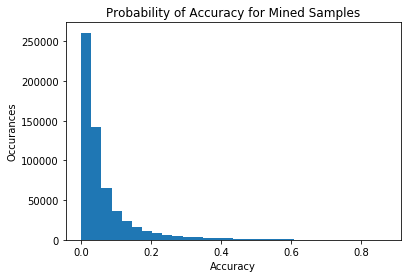

In [11]:
plt.show()

In [12]:
mined_train.describe()

,id,parent_answer_post_id,prob,question_id
count,5.938910e+05,5.938910e+05,593891.000000,5.938910e+05
mean,5.024786e+16,1.859959e+07,0.064413,1.672431e+07
std,9.187890e+16,1.260624e+07,0.085104,1.227807e+07
min,5.945950e+06,5.950000e+02,0.000030,5.020000e+02
25%,9.673907e+14,7.669063e+06,0.016376,6.196250e+06
50%,1.613794e+16,1.657090e+07,0.034263,1.416615e+07
75%,3.513231e+16,2.960653e+07,0.074638,2.565613e+07
max,4.276938e+17,4.277310e+07,0.869000,4.277182e+07


We see that the majority of samples in our dataset have a probability below 0.1

Let's see what samples with this level of probability look like.

In [13]:
import random

low_prob = mined_train.loc[mined_train['prob'] < 0.1]
high_prob = mined_train.loc[mined_train['prob'] > 0.6]

print("========= PROB > 60% =========")
print()
for i in range(5):
    rand = random.randint(0, len(high_prob))
    print("INTENT: " + high_prob.iloc[rand]["intent"])
    print("CODE: " + high_prob.iloc[rand]["snippet"])
    print("p=" + str(round(high_prob.iloc[rand]["prob"], 3)))
    print()
    
print ("========= PROB < 10% =========")
print()
for i in range(5):
    rand = random.randint(0, len(low_prob))
    print("INTENT: " + low_prob.iloc[rand]["intent"])
    print("CODE: " + low_prob.iloc[rand]["snippet"])
    print("p=" + str(round(low_prob.iloc[rand]["prob"], 3)))
    print()

========= PROB > 60% =========

INTENT: How can I insert NULL data into MySQL database with Python?
CODE: cursor.execute('INSERT INTO table (`column1`) VALUES (%s)', (value,))
p=0.647

INTENT: How to exclude a character from a regex group?
CODE: re.compile('[^a-zA-Z0-9-]+')
p=0.713

INTENT: Pandas Data Frame Plotting
CODE: df.plot(title='Title Here')
p=0.673

INTENT: Python getting a string (key + value) from Python Dictionary
CODE: """, """.join(['{}_{}'.format(k, v) for k, v in d.items()])
p=0.647

INTENT: Replace console output in Python
CODE: sys.stdout.flush()
p=0.602

========= PROB < 10% =========

INTENT: Assert mocked function called with json string in python
CODE: call = mock_funct.call_args
p=0.004

INTENT: One-line & multi-line loops and vectorization in Python
CODE: break
p=0.061

INTENT: Can't use an inheriting Django model's Meta class to configure a field defined in an inherited abstract model
CODE: def dynamic_field_definition(cls):
    pass

def dynamic_field_definit

In [14]:
len(mined_train.loc[mined_train['prob'] > 0.6])

1116

### Potential concerns:

- Examples with a probability of less than 60% do not seem reasonably reliable to train on, but filtering these out we are left with only 1,116 datapoints.
- A lot of examples refer to obscure libraries. How will we gain information about all of these libraries?
- Not all intents have specified names or values for every variable necessary to produce code snippet.
    - How will these values be generated, and will this effect the accuracy score?
- Small dataset means our model will be familiar with a very limited number of situations.
    - We have approx 1116 mined + 2379 annoted examples, 3495 total useable samples

## Potential Alternative Datasets

#### StaQC https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Seems like the code snippets seem more accurate, but they are not limited in length. Probably too complex to generate. Potential work-arounds: subset this dataset to include only one-line snippets, or explore the methodolgy they used to mine our own code snippets.

#### EdinburgNLP https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Doc-to-code generation, BLEU score < 15%. This is more of a project than a dataset.

#### Pseudogen https://ahcweb01.naist.jp/pseudogen/
Also more of a project than a dataset. Generates pseudocode from python code.

#### Django https://github.com/odashi/ase15-django-dataset
This was used by one of the main preceding studies we saw in our lit review, https://arxiv.org/abs/1704.01696. It contains english and python snippets, and while it seems like it may have some more complex snippets (longer than one line), it is worth looking into.

# Word2Vec

In [15]:
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec

In [16]:
mined_train["intent"][0:10]

0                   Sort a nested list by two elements
1                 converting integer to list in python
2             Converting byte string in unicode string
3                      List of arguments with argparse
4    How to convert a Date string to a DateTime obj...
5    How to efficiently convert Matlab engine array...
6                  Converting html to text with Python
7      regex for repeating words in a string in Python
8            Ordering a list of dictionaries in python
9                  Two Combination Lists from One List
Name: intent, dtype: object

In [17]:
import string
from nltk import word_tokenize

def prep(lines):
    result = []
    for line in lines:
        if line != None:
            result.append(word_tokenize(line.lower()))
    return result

In [18]:
# size = 64, dimensions
# sg = 1, use Skip-Gram. If zero, it will use CBOW[]
# window = 10, context words (10 to the left and 10 to the right)
# min_count = 5, ignore words with frequency lower than that
# seed = 42, the answer to the universe, life and everything.
# workers = 2, number of worker threads.
intent_model = Word2Vec(sentences=prep(a_train["rewritten_intent"]), size=64, sg=1,
                 window=10, min_count=5, seed=42,
                 workers=2)

code_model = Word2Vec(sentences=prep(a_train["snippet"]), size=64, sg=1,
                 window=10, min_count=5, seed=42,
                 workers=2)

In [19]:
print("INTENT MODEL")
print(*list(intent_model.wv.vocab)[0:5], sep='\n')
print()
print("CODE MODEL")
print(*list(code_model.wv.vocab)[0:5], sep='\n')

INTENT MODEL
concatenate
elements
of
a
list

CODE MODEL
sum
(
d
*
10


In [20]:
def printSimilar(word, model):
    print(word.upper())
    for i in range(8):
        print(model.most_similar(word)[i][0])
    print()
        
printSimilar("list", intent_model)
printSimilar("array", intent_model)
printSimilar("x", code_model)
printSimilar("if", code_model)

LIST
tuples
containing
create
items
elements
l
lists
tuple

ARRAY
numpy
at
containing
create
2d
elements
l
every

X
sum
len
==
zip
l
reverse=true
key=lambda
sorted

IF
for

/Users/mariah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/Users/mariah/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):



in
lst
list
d.items
enumerate
dict
pass



## Abstract Syntax Tree Encoding/Decoding

In [21]:
import ast
import astor

expr = mined_train.iloc[0]["snippet"]
expr_ast = ast.parse(expr)
expr_ast

ast.dump(expr_ast)

In [22]:
tree = ast.parse(expr_ast)
decoded = astor.to_source(tree)
print("ORIGINAL: \n" + expr)
print("DECONVERTED FROM TREE: \n" + str(decoded))

ORIGINAL: 
sorted(l, key=lambda x: (-int(x[1]), x[0]))
DECONVERTED FROM TREE: 
sorted(l, key=lambda x: (-int(x[1]), x[0]))



In [23]:
ast.dump(tree)

"Module(body=[Expr(value=Call(func=Name(id='sorted', ctx=Load()), args=[Name(id='l', ctx=Load())], keywords=[keyword(arg='key', value=Lambda(args=arguments(args=[arg(arg='x', annotation=None)], vararg=None, kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), body=Tuple(elts=[UnaryOp(op=USub(), operand=Call(func=Name(id='int', ctx=Load()), args=[Subscript(value=Name(id='x', ctx=Load()), slice=Index(value=Num(n=1)), ctx=Load())], keywords=[])), Subscript(value=Name(id='x', ctx=Load()), slice=Index(value=Num(n=0)), ctx=Load())], ctx=Load())))]))])"

In [24]:
print(astor.dump(tree))

Module(
    body=[
        Expr(
            value=Call(func=Name(id='sorted'),
                args=[Name(id='l')],
                keywords=[
                    keyword(arg='key',
                        value=Lambda(
                            args=arguments(args=[arg(arg='x', annotation=None)],
                                vararg=None,
                                kwonlyargs=[],
                                kw_defaults=[],
                                kwarg=None,
                                defaults=[]),
                            body=Tuple(
                                elts=[
                                    UnaryOp(op=USub,
                                        operand=Call(func=Name(id='int'),
                                            args=[Subscript(value=Name(id='x'), slice=Index(value=Num(n=1)))],
                                            keywords=[])),
                                    Subscript(value=Name(id='x'), slice=Index(value=Num(n=0)

/Users/mariah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: astor.dump is deprecated.  Please use astor.dump_tree.
  """Entry point for launching an IPython kernel.


In [25]:
len(a_train)

2379

# Investigate Baseline Results

In [36]:
answer = pd.read_json("answer.txt")
expected = pd.read_json('../../Conala Challenge/conala-corpus/conala-test.json')
type(result)

pandas.core.frame.DataFrame

In [44]:
results = expected[["rewritten_intent", "snippet"]].join(answer).rename(index=str, columns={0: "output"})

In [63]:
results.head(10)

,rewritten_intent,snippet,output
0,send a signal `signal.SIGUSR1` to the current ...,"os.kill(os.getpid(), signal.SIGUSR1)","<unk> .<unk>_<unk> ( [ 'shutdown' , '/<unk>' ] )"
1,decode a hex string '4a4b4c' to UTF-8.,bytes.fromhex('4a4b4c').decode('utf-8'),print('<unk> <unk> <unk> <unk> <unk> <unk> <un...
2,check if all elements in list `myList` are ide...,all(x == myList[0] for x in myList),[i for i in range() for i in range(0)]
3,format number of spaces between strings `Pytho...,"print('%*s : %*s' % (20, 'Python', 20, 'Very G...",print ( [ i for i in range ( 100 ) for i in ra...
4,None,d.decode('cp1251').encode('utf8'),print ( s . decode ( 'raw_unicode_escape' ) )
5,get rid of None values in dictionary `kwargs`,"res = {k: v for k, v in list(kwargs.items()) i...","d = set(['<unk>', '<unk>'])"
6,get rid of None values in dictionary `kwargs`,"res = dict((k, v) for k, v in kwargs.items() i...","d = set(['<unk>', '<unk>'])"
7,capture final output of a chain of system comm...,subprocess.check_output('ps -ef | grep somethi...,cursor.execute(\n 'INSERT <unk> <unk> <unk>...
8,"concatenate a list of strings `['a', 'b', 'c']`",""""""""""""".join(['a', 'b', 'c'])","set(['a', 'b', 'b'])"
9,find intersection data between series `s1` and...,pd.Series(list(set(s1).intersection(set(s2)))),[x[0][0][0][0].any()[0].sum()]


### Initial insights:
- Variable names are not being recognized and used in final output. Identifying variable names in preprocessing may help make the output more effective.
- Key verbs like "write", "convert" and "get" are not given any extra priority right now.
    - These verbs could be coerced into becoming functions, even if not present in dataset?
- Training set itself does not seem to be 100% clean

### What it's doing effectively:
- Generally recognizes need to iterate?

In [61]:
r = results.iloc[471]
for c in results.columns:
    print(r[c])

Convert integer `number` into an unassigned integer
struct.unpack('H', struct.pack('h', number))
struct.unpack('<unk>', 16)


In [62]:
import random
indices = random.sample(range(0, 500), 10)

for i in indices:
    for c in results.columns:
        print(results.iloc[i][c])
    print()

unzip list `original` and return a generator
result = ((a for (a, b) in original), (b for (a, b) in original))
<unk> = [ i for i in range ( 100 ) ]

encode string 'data to be encoded'
encoded = base64.b64encode('data to be encoded')
"""hello <unk>""".strip()

find 10 largest differences between each respective elements of list `l1` and list `l2`
heapq.nlargest(10, range(len(l1)), key=lambda i: abs(l1[i] - l2[i]))
[ ( x [ i ] for i , j in zip ( e1 , List2 ) ]

pandas: delete rows in dataframe `df` based on multiple columns values
df.set_index(list('BC')).drop(tuples, errors='ignore').reset_index()
df.groupby(['<unk>', '<unk>'], inplace=True)

get a value of datetime.today() in the UTC time zone
datetime.now(pytz.utc)
datetime.datetime.now().strftime('%A', 1)

split a string `mystring` considering the spaces ' '
mystring.replace(' ', '! !').split('!')
s.split(' ', s)

convert list `list_of_ints` into a comma separated string
""",""".join([str(i) for i in list_of_ints])
str_list = [ '' . 

# Generate file with best mined data

In [66]:
best_mined = mined_train.loc[mined_train['prob'] > 0.6]
out = best_mined.to_json(orient='records')

In [67]:
with open('../../Conala Challenge/conala-corpus/conala-best_mined.json', 'w') as f:
    f.write(out)